In [2]:
import matplotlib.pyplot as plt
import numpy as np


In [3]:
intel_data = [
    (1595533933, 54),
    (1595541955, 56),
    (1595551478, 44),
    (1595552827, 42),
    (1595566626, 37),
    (1595574957, 34),
    (1595581341, 36),
    (1595587042, 41),
    (1595600624, 55),
    (1595606998, 59),
    (1595607900, 60),
    (1595628871, 72),
    (1595657486, 43),
    (1595663209, 38),
    (1595675378, 42),
    (1595685469, 50)
]

alliance_data = [
#     (1595440499, 50),
    (1595598632, 52),
    (1595609552, 63),
    (1595614892, 67),
    (1595620021, 70),
    (1595620034, 71),
]

fc_data = [
    (1595609507, 63)
]

public_data = [
    (1595517005, 60),
    (1595553655, 41),
    (1595652673, 47)
]

edi_general_data = [
    (1595501093, 55),
    (1595509880, 60),
    (1595545922, 50),
    # images
    (1595517054, 62),
    (1595497400, 51.5)
]

In [4]:
from datetime import datetime


In [5]:
import pandas as pd

In [6]:
data = intel_data + alliance_data + fc_data + edi_general_data

In [7]:
df = pd.DataFrame([{'timestamp': x[0], 'pc': x[1]} for x in data])
df['time'] = df['timestamp'].apply(datetime.fromtimestamp)

In [8]:
df = df.sort_values('time')

In [9]:
trig_fleet = (datetime.fromtimestamp(1595553569), datetime.fromtimestamp(1595556321))

ed_fleets = [
    pd.to_datetime(['2020-07-23 10:00:00', '2020-07-23 17:10:00']),
    pd.to_datetime(['2020-07-23 20:00:00', '2020-07-23 23:20:00']),
    pd.to_datetime(['2020-07-24 08:00:00', '2020-07-24 23:00:00']),
    pd.to_datetime(['2020-07-25 08:00:00', '2020-07-25 15:00:00'])
]

In [10]:
from matplotlib.ticker import PercentFormatter
from matplotlib.dates import DateFormatter, ConciseDateFormatter, AutoDateLocator

In [22]:
import seaborn as sns
from matplotlib.patches import Patch
sns.set_context('talk')

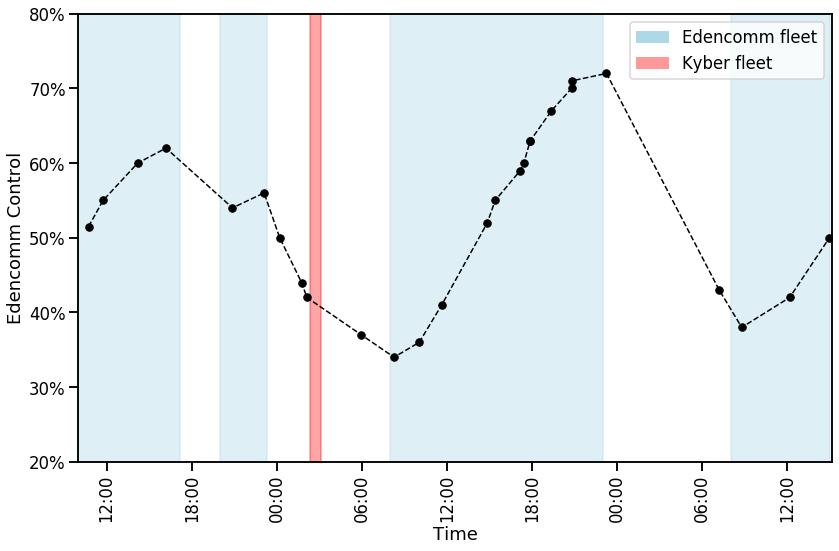

In [39]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(df['time'], df['pc'], marker='.', linestyle='--', color='k', markersize=15, linewidth=1.5)

for f in ed_fleets:
    ax.fill_between(x=trig_fleet, y1=[0, 0], y2=[100, 100], color='red', alpha=.1)

for f in ed_fleets:
    ax.fill_between(x=f, y1=[0, 0], y2=[100, 100], color='lightblue', alpha=.4)
    
# ax.axhline(50, color='gray', alpha=.2)

ax.yaxis.set_major_formatter(PercentFormatter())
ax.xaxis.set_major_formatter(DateFormatter('%H:00'))
locator = AutoDateLocator()
# ax.xaxis.set_major_formatter(ConciseDateFormatter(locator))
plt.xticks(rotation='vertical')
ax.set_xlim(pd.to_datetime(['2020-07-23 10:00:00', '2020-07-25 15:10:00']))
ax.set_ylim(20, 80)
ax.set_xlabel('Time')
ax.set_ylabel('Edencomm Control')

legend_elements = [
    Patch(facecolor='lightblue', label='Edencomm fleet'),
    Patch(facecolor='red', label='Kyber fleet', alpha=.4)
]

ax.legend(handles=legend_elements, loc='best')
fig.tight_layout()

fig.savefig('passari.png')